In [1]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 16.8 MB/s eta 0:00:00:00:0100:01


In [2]:
!pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 7.5 MB/s eta 0:00:00


In [3]:
from transformers import TrOCRProcessor ,VisionEncoderDecoderModel
import os
import re
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [9]:
processor = TrOCRProcessor.from_pretrained('/kaggle/input/vittrocr-es', 
                                          )

model = VisionEncoderDecoderModel.from_pretrained('/kaggle/input/vittrocr-es',  
                                 # device_map='cuda', 
                                  use_safetensors=True, 
                                  )

#model = model.eval().cuda()

In [10]:
base_dir = '/kaggle/input/ai-god-2/test_images/test_images'

In [11]:
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', s)]

In [12]:
spanish_dictionary = {
   # 'ç': 'z',
    'juyzios ': 'juicios ',
    'qüe': 'que',  
    'España': 'Espana',  
    'sue': 'fue',  
    'benesicio': 'beneficio',  
    'susrir': 'sufrir',  
    'uirtud': 'virtud', 
    'dixo': 'dijo',  
    'doze': 'dose', 
    'cos': 'tos',  
    'diuina':'divina',
    'uida' : 'vida',
    'ualen ' : 'valen ',
    'ciempo' : 'tiempo',
    'uueltra ': 'vueltra ',
    "ciuil" : 'civil',
    'desestimar' :'delestimar' ,
    'consitte': 'consiste' ,
    'uicios':'vicios',
    'bareza':'bajeza' ,
    'coracon':'coragon' ,
    'accerimo':'accerrimo' ,
    'jvicios ' : 'juicios ',
    'truxeron': 'trujeron',
    'seltalle' : 'sestalle',
    'sermedad' : 'fermedad',
    'principi-' : 'princi-',
    'uueltra' : 'vuestra' ,
    'cidenres' : 'cidentes' , 
    'aora' : 'ahora',
    'renazcays' : 'renazcais',
    'polible' : 'posible',
    'cengo' : 'tengo',
    'elte' : 'este',
    'libreys' : 'libreis',
    'exercicio' : 'ejercicio',
    'Macltro' : 'maestro',
    'elpiri-' : 'espiri-',
    'cu' : 'tu',
    'Mageltad' : 'Majestad',
    'prouidencia' : 'providencia',
    'uosotros' : 'vosotros',
    'Elpiri' : 'Espiri',
    'sebrenatural' : 'sobrenatural',
    'duina' : 'divina',
    'uerdadera' : 'verdadera' , 
    'oyo' : 'oido',
    'uuestras' : 'vueltras',
    'sauor' : 'favor',
    'uicimamente' : 'ultimamente',
    'incentiuo' : 'incentivo',
    'tuuiera' : 'tuviera',
    'conserua-' : 'conserva-',
    'uino' : 'uno',
    'casidad' : 'calidad',
    'qualquiera' : 'cualquiera',
    'uerdadera': 'verdadera',
    'esecto' : 'efecto',
    'ted' : 'sed',
    'generolo' : 'generoso',
    'esclauo' : 'esclavo',
    'cadauer' : 'cadaver',
    'fuerca' : 'fuerza',
    'elte' : 'este',
    'susiciente' :'suficiente',
    'uirtuo-' : 'virtuo-',
    'luyo' : 'suyo',
    'coragon' : 'corazon',
    'rectissimos ' : 'rectísimos ',
    'ocul' : 'oculo',
    'sencimiento' : 'sentimiento',
    'el-' : 'es-',
    'colas': 'cosas',
    '(on' : 'son',
    'dexandose' : 'demandose',
    'depraudas': 'depravdas',
    'uian' : 'vivan',
    'deseltimandose' : 'desestimandose',
    'co.' : 'to-',
    'colas' : 'cosas',
    'tiendo' : 'siendo',
    'Dauid' : 'David',
    'abacio' : 'abatio',
    'uerdadera' :'verdadera',
    'seruir' : 'servir',
    'uemos' : 'vemos' ,
    'uicios' :'vicios' ,
    'ciuil' : 'civil',
    'uersos' : 'versos',
    'lotos' : 'locos',
    'tiempos' : 'ciempos',
    'casi' : 'cali',
    'vida' : 'uida',
    'gradia' : 'gracia',
    'uiuir' : 'vivir',
    'des' : 'del',
    'baxeza' : 'bajeza',
    'abarirle' : 'abatrirse',
    'consille' : 'consisle',
    'sas' : 'las',
    'codas' : 'todas',
    'sufrir' : 'susrir',
    'uinculada' : 'vinculada',
    'hazienda' : 'hacienda',
    'uos' : 'vos',
    'dizo' : 'dijo',
    
   
}

In [13]:
custom_dictionary = {
    'v': 'u',
    'f': 's',
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'ñ': 'n',
    'è': 'e',
    'à': 'a',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U',
    'eltrecha' : 'estrecha',
    'ciempo' : 'tiempo',
    'En' : 'fin' ,
    'seltalle' : 'sestalle',
    'desde ' : 'delde ',
    'uueltra' : 'vuestra',
    'cidenres' : 'cidentes',
    'procuro ' : 'proturo ',
    'uirtud' : 'virtud',
    'documenten-' : 'dotumenten-',
    'desue-' : 'defue-',
    'cengo' : 'tengo' ,
    'uosotros' : 'vosotros',
    'fin' :'en' ,
    'despues' : 'delpues',
    'mercedes' : 'mercedel',
    'uicios' : 'vicios' ,
    'valen' : 'ualen',
    'uersos' : 'versos',
    'vida' : 'uida' ,
    'descuydo' : 'deltuydo' ,
    'uerdades':'uerdadel',
    'uirtudel' : 'virtudel',
    'sas' : 'las',
    'sufrir' : 'susrir' ,
    'eltrecha' : 'estrecha',
    'desensor' : 'delensor',
    'efte' : 'este',
    'benesiciosige' : 'benesifiosige',
    'sorcosa' : 'sorcosa',
    'generolo' : 'generoso',
    'vida' : 'uida' ,
    'suerca' : 'fuerza ',
    'coragon' : 'corazon',
    'suerza' : 'suerza',
    'disicursos' : 'disitursos',
    'cosas' : 'colas',
}

In [14]:
import numpy as np

In [15]:
import faiss
from sentence_transformers import SentenceTransformer


dictionary_keys = list(spanish_dictionary.keys())
dictionary_values = list(spanish_dictionary.values())
embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
key_embeddings = embedding_model.encode(dictionary_keys)


faiss_index = faiss.IndexFlatL2(key_embeddings.shape[1]) 
faiss_index.add(np.array(key_embeddings).astype('float32'))  


faiss.write_index(faiss_index, "faiss_!!!file.index")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
faiss_index = faiss.read_index("/kaggle/working/faiss_!!!file.index")

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Original OCR Prediction: uro Señor por fus rectifsimos y ocul


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_1: uro Senor por sus rectísimos  y oculo


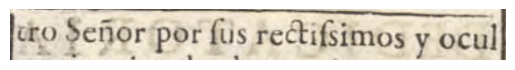

Original OCR Prediction: cos juyzios de darme ciempo, para


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_2: tos juicios  de darme tiempo, para


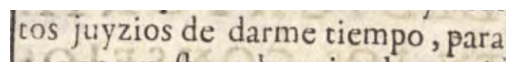

Original OCR Prediction: que en vueltra educacion lo mani


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_3: que en vuestra educacion lo mani


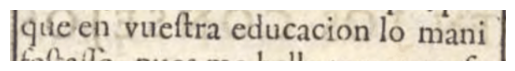

Original OCR Prediction: feltalle, pues me hallo tantos mefes


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_4: sestalle, pues me hallo tantos meses


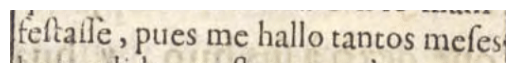

Original OCR Prediction: ha rendida en efta cama, al vna en


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_5: ha rendida en esta cama, al una en
Original OCR Prediction: fermedad tal, que defde fu, principi-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_6: fermedad tal, que delde su, princi-
Original OCR Prediction: pio me amenaza con la muerte, y


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_7: pio me amenaza con la muerte, y
Original OCR Prediction: vueltra, orfandad en tiernos años,


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_8: vuestra, orsandad en tiernos anos,
Original OCR Prediction: ali pues como os di al mundo con


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_9: ali pues como os di al mundo con
Original OCR Prediction: dolores, con los de tan penofos ac-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_10: dolores, con los de tan penosos ac-
Original OCR Prediction: cidenres, os  procuro  encaminar


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_11: cidentes, os proturo encaminar
Original OCR Prediction: aora à Dios, y que renazcays de mi


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_12: ahora a Dios, y que renazcais de mi
Original OCR Prediction: para el, por medio de la virtud, a


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_13: para el, por medio de la virtud, a
Original OCR Prediction: que os exorco con eftos documenten-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_14: que os exorco con estos dotumenten-
Original OCR Prediction: cos (que he recogido con el defue-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_15: tos (que he recogido con el defue-
Original OCR Prediction: lo polible) juzgando es la mas efti-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_16: lo polible) juzgando es la mas esti-
Original OCR Prediction: mable herencia que puedo  dexaros


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_17: mable herencia que puedo dexaros
Original OCR Prediction: en prendas del  entrañable amor


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_18: en prendas del entranable amor
Original OCR Prediction: que os cengo,por elte, y en primer


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_19: que os tengo,por elte, y en primer
Original OCR Prediction: lugar por el que deueys à Dios,os


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_20: lugar por el que deueys a Dios,os
Original OCR Prediction: pido, y encargo, que me libreys la


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_21: pido, y encargo, que me libreis la
Original OCR Prediction: paga en el puntual exercicio dellos,


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_22: paga en el puntual ejercicio dellos,
Original OCR Prediction: v en premio os prometo ( con mi


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_23: u en premio os prometo ( con mi
Original OCR Prediction: bendicion, que defde aqui os doy)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_1_L_24: bendicion, que delde aqui os doy)
Original OCR Prediction: de parte de Dios los doze mas ex-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_1: de parte de Dios los dose mas ex-
Original OCR Prediction: celentes que vn Macltro de elpiri-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_2: celentes que un maestro de espiri-
Original OCR Prediction: cu largamente efcriue, y fon en fu-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_3: tu largamente escriue, y son en su-
Original OCR Prediction: ma:que tendra fu diuina Mageltad


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_4: ma:que tendra su divina Majestad
Original OCR Prediction: prouidencia particular de vofotros,


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_5: providencia particular de vosotros,
Original OCR Prediction: y os concederá la gracia del  Elpiri


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_6: y os concedera la gracia del Espiri
Original OCR Prediction: cu Santo, fus confolaciones, y lum-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_7: tu Santo, sus consolaciones, y lum-
Original OCR Prediction: bre febrenatural, la alegria de la


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_8: bre sebrenatural, la alegria de la
Original OCR Prediction: buena conciencia,la efperanca en la


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_9: buena conciencia,la esperanca en la
Original OCR Prediction: duina mifericordia, la verdadera li


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_10: divina misericordia, la verdadera li
Original OCR Prediction: bertad, y paz interior), oyo grato a


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_11: bertad, y paz interior), oido grato a
Original OCR Prediction: vueftras oraciones, fu alliftencia, y


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_12: vueltras oraciones, su allistencia, y
Original OCR Prediction: fauor en los trabajos, y bendiciones


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_13: favor en los trabajos, y bendiciones
Original OCR Prediction: que en la Santa  Éfcritura  promete


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_14: que en la Santa Escritura promete
Original OCR Prediction: a los virtuofos de rodo lo temporal,


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_15: a los uirtuosos de rodo lo temporal,
Original OCR Prediction: y vicimamente, gloriofo y alegre


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_16: y uicimamente, glorioso y alegre
Original OCR Prediction: En, que cada cola, deftas por fi pu-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_17: en, que cada cola, destas por si pu-
Original OCR Prediction: diera fernos incentivo para feguir


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_18: diera sernos incentivo para seguir
Original OCR Prediction: el camino de la virtud, aunque no


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_19: el camino de la virtud, aunque no
Original OCR Prediction: nos tuuiera Dios de antemano o-


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_20: nos tuviera Dios de antemano o-
Original OCR Prediction: bligados a ella, porfer el que es, y


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_21: bligados a ella, porser el que es, y
Original OCR Prediction: por los inefimables beneficiosige


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Processed P_2_L_22: por los inesimables benesifiosige


In [ ]:

def apply_ocr(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to("cpu")
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
    predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return predicted_text


def correct_text(text):
    for old_word, new_word in custom_dictionary.items():
        text = text.replace(old_word, new_word)
    return text


def correct_with_faiss(text, embedding_model, faiss_index, dictionary_keys, dictionary_values):
    words = text.split()  
    corrected_words = []  
    
    for word in words:
        
        word_embedding = embedding_model.encode([word])
        
        
        D, I = faiss_index.search(word_embedding.astype('float32'), k=1)  
        
        
        if D[0][0] < 0.7: 
            closest_word = dictionary_values[I[0][0]] 
            corrected_words.append(closest_word)
        else:
            corrected_words.append(word) 
    
    return ' '.join(corrected_words)


def natural_sort_key(s):
    return [int(text) if text.isdigit() else text for text in re.split(r'(\d+)', s)]


submission_data = []

for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    page_number = folder.split('_')[-1]
    
    if os.path.isdir(folder_path):
        for image_file in sorted(os.listdir(folder_path), key=natural_sort_key):
            if image_file.endswith('.png'):
                image_path = os.path.join(folder_path, image_file)
                line_number = image_file.split('_')[-1].split('.')[0]
                formatted_image_id = f'P_{page_number}_L_{line_number}'
                
               
                predicted_text = apply_ocr(image_path)
                print(f"Original OCR Prediction: {predicted_text}")
                
               
                corrected_text = correct_text(predicted_text)
                
                
                corrected_text = correct_with_faiss(corrected_text, embedding_model, faiss_index, dictionary_keys, dictionary_values)
                
                
                submission_data.append({'unique Id': formatted_image_id, 'prediction': corrected_text})
                
                print(f"Processed {formatted_image_id}: {corrected_text}")
                
                
                if len(submission_data) < 5:
                    img = plt.imread(image_path)
                    plt.imshow(img)
                    plt.axis('off')
                    plt.show()

In [ ]:
submission_df = pd.DataFrame(submission_data)
submission_df.to_csv('208.csv', index=False)